<a href="https://colab.research.google.com/github/ColorfulWave/machine-learning-practice/blob/main/Random_Forest_%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UCI Machin Learning Repositoryからワインのデータをロード

In [7]:
from urllib.request import urlretrieve
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
urlretrieve(url, 'winequality-white.csv')

import pandas as pd
wine = pd.read_csv('winequality-white.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Random Forest

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# wineデータセットの品質分布を確認
print("--- 元の品質ラベルの分布 ---")
print(wine['quality'].value_counts().sort_index())
print("-" * 30)

# データをラベルとデータに分離
x = wine.drop('quality', axis=1)
y = wine['quality']

# 学習用とテスト用に分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 学習する
model = RandomForestClassifier()
model.fit(x_train, y_train)

# テストして結果を表示する
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print('正解率 = ', accuracy_score(y_test, y_pred))

--- 元の品質ラベルの分布 ---
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64
------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.79      0.39      0.52        28
           5       0.77      0.65      0.70       329
           6       0.62      0.84      0.72       416
           7       0.70      0.50      0.59       169
           8       0.80      0.25      0.38        32
           9       0.00      0.00      0.00         3

    accuracy                           0.68       980
   macro avg       0.53      0.38      0.42       980
weighted avg       0.69      0.68      0.67       980

正解率 =  0.6795918367346939


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


-----

# 分類レポート (Classification Report) の詳細解説

ご提示いただいた分類レポートは、機械学習モデルの分類性能を評価するための詳細な指標を示しています。特にワインの品質分類のような**多クラス分類問題**において、**各品質スコア（クラス）の性能を個別に把握する**のに非常に役立ちます。

-----

## 📊 レポートの全体像

以下の分類レポートについて解説します。

```
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.79      0.39      0.52        28
           5       0.77      0.65      0.70       329
           6       0.62      0.84      0.72       416
           7       0.70      0.50      0.59       169
           8       0.80      0.25      0.38        32
           9       0.00      0.00      0.00         3

    accuracy                           0.68       980
   macro avg       0.53      0.38      0.42       980
weighted avg       0.69      0.68      0.67       980
```

このレポートは、主に以下の3つのセクションに分かれています。

  * **各クラスの性能指標**:
      * レポートの上部にある `3`, `4`, `5`, `6`, `7`, `8`, `9` という行が該当します。これらは、ワインの\*\*品質スコア（クラスラベル）\*\*を示しています。
  * **全体の集計指標**:
      * `accuracy`、`macro avg`、`weighted avg` の行が該当します。これらは、モデル**全体の性能を要約**したものです。
  * **サポート数 (`support`)**:
      * 各クラスに存在する**実際のサンプル数**を示します。

-----

## 📈 各列の指標の意味

レポートの各列には、モデルの性能を評価するための重要な指標が含まれています。

### 1\. `precision` (適合率)

  * **定義**: あるクラスとして**予測されたサンプルのうち**、**実際にそのクラスであったサンプルの割合**。
  * **計算式**:
    $$
    $$$$Precision = \\frac{True \\ Positives}{True \\ Positives + False \\ Positives}
    $$
    $$$$  \* **True Positives (真陽性)**: 正しく陽性と予測された数
      * **False Positives (偽陽性)**: 誤って陽性と予測された数（実際は陰性なのに陽性と予測した）
  * **解釈**: 「**モデルが〇〇だと予測した場合、その予測がどれだけ正しかったか**」を示します。偽陽性（誤って予測した数）が少ないほど高くなります。

### 2\. `recall` (再現率)

  * **定義**: 実際にそのクラスであるサンプルのうち、**モデルが正しくそのクラスだと予測できたサンプルの割合**。
  * **計算式**:
    $$
    $$$$Recall = \\frac{True \\ Positives}{True \\ Positives + False \\ Negatives}
    $$
    $$$$  \* **True Positives (真陽性)**: 正しく陽性と予測された数
      * **False Negatives (偽陰性)**: 誤って陰性と予測された数（実際は陽性なのに陰性と予測した、つまり見逃した数）
  * **解釈**: 「**実際に〇〇であるものを見逃さずに、どれだけ多く検出できたか**」を示します。偽陰性（見逃した数）が少ないほど高くなります。

### 3\. `f1-score` (F1スコア)

  * **定義**: PrecisionとRecallの**調和平均**。
  * **計算式**:
    $$
    $$$$F1 = 2 \\times \\frac{Precision \\times Recall}{Precision + Recall}
    $$
    $$$$
    $$
  * **解釈**: PrecisionとRecallはトレードオフの関係にあることが多いため、F1スコアは**両方のバランスを考慮した指標**です。どちらか一方が極端に低い場合には、F1スコアも低くなります。高いF1スコアは、モデルが偽陽性と偽陰性の両方をうまく抑えていることを意味します。

### 4\. `support` (サポート数)

  * **定義**: **テストセット内に実際に存在する各クラスのサンプル数**。
  * **解釈**: クラスごとのデータの量を示します。この数値が**極端に小さいクラス**は、**クラス不均衡問題**を示唆している可能性が高いです。

-----

## 🔍 レポートの具体的な解釈

あなたのレポートの各行を詳しく見ていきましょう。今回はワインの品質スコア（3〜9）に対応しているため、その文脈で解説します。

### **ワイン品質ごとの性能詳細**

  * **品質 `3`**:

      * `precision`: `0.00` / `recall`: `0.00` / `f1-score`: `0.00`
      * `support`: `3`
      * テストセットに3つの「品質3」のワインがありましたが、モデルは**一つも「品質3」と予測せず、全て見逃しています**。これは、サンプル数が非常に少ないため、モデルがこの品質を**学習しきれていない**、または**完全に無視している**状態を示します。

  * **品質 `4`**:

      * `precision`: `0.79` / `recall`: `0.39` / `f1-score`: `0.52`
      * `support`: `28`
      * モデルが「品質4」と予測したワインは\*\*79%**が正しかった一方で、実際に「品質4」であるワインの**39%\*\*しか見つけられていません。**品質4のワインを半分以上見逃している**ことになります。

  * **品質 `5`**:

      * `precision`: `0.77` / `recall`: `0.65` / `f1-score`: `0.70`
      * `support`: `329`
      * 比較的バランスの取れた性能です。モデルが「品質5」と予測すると\*\*77%**が正しく、実際の「品質5」の**65%\*\*を見つけられています。
      * これは**多数派クラスの一つ**であり、モデルが比較的学習できています。

  * **品質 `6`**:

      * `precision`: `0.62` / `recall`: `0.84` / `f1-score`: `0.72`
      * `support`: `416`
      * **最も多いクラス**であり、モデルは実際に「品質6」であるワインの**84%という非常に高い再現率**を達成しています。つまり、この品質のワインをほとんど見逃していません。予測の正確性（Precision）は他のクラスより若干低いですが、見つける能力は高いです。

  * **品質 `7`**:

      * `precision`: `0.70` / `recall`: `0.50` / `f1-score`: `0.59`
      * `support`: `169`
      * モデルが「品質7」と予測したものは\*\*70%**が正しく、実際の「品質7」の**50%\*\*を見つけています。半分は見逃している状態です。

  * **品質 `8`**:

      * `precision`: `0.80` / `recall`: `0.25` / `f1-score`: `0.38`
      * `support`: `32`
      * モデルが「品質8」と予測したものは\*\*80%**とかなり正確ですが、実際の「品質8」の**25%\*\*しか見つけられていません。**ほとんど見逃している**状態です。

  * **品質 `9`**:

      * `precision`: `0.00` / `recall`: `0.00` / `f1-score`: `0.00`
      * `support`: `3`
      * テストセットに3つの「品質9」のワインがありましたが、モデルは**一つも「品質9」と予測せず、全て見逃しています**。品質3と同様に、**極端な少数派クラス**です。

-----

### **全体の集計指標**

  * **`accuracy` (正解率)**: `0.68`

      * モデルがテストセットの\*\*全サンプルを正しく分類できた割合は68%\*\*でした。
      * **⚠️ 注意点**: この数値は全体的な正解を示しますが、**多数派クラス（品質5, 6）の性能に大きく引っ張られている**可能性があります。少数派クラスの性能はこれだけでは分かりにくいです。

  * **`macro avg` (マクロ平均)**:

      * `precision`: `0.53` / `recall`: `0.38` / `f1-score`: `0.42`
      * **定義**: **各クラスの指標を単純に平均したもの**。クラスのサンプル数（`support`）に関わらず、すべてのクラスを平等に扱います。
      * **解釈**: クラス不均衡がある場合、マクロ平均は**少数派クラスの性能低下を明確に反映**するため、正解率よりも**モデルのバランスの取れた性能**を評価するのに適しています。このレポートでは、極端な少数派クラス（品質3, 9）や少数派クラス（品質4, 8）のRecallが非常に低いため、マクロ平均のRecallとF1スコアがかなり低くなっています。これは、モデルが一部の品質を全く予測できていないことを強く示唆しています。

  * **`weighted avg` (加重平均)**:

      * `precision`: `0.69` / `recall`: `0.68` / `f1-score`: `0.67`
      * **定義**: **各クラスの指標を、そのクラスのサンプル数（`support`）で重み付けして平均したもの**。
      * **解釈**: サンプル数が多いクラスの性能が全体の平均に大きく影響します。このレポートでは、多数派の品質5, 6の性能がモデル全体に大きく影響し、加重平均も全体的な正解率に近い値を示しています。

-----

## 🎯 このレポートから読み取れるモデルの課題と改善の方向性

このレポートから、あなたのワイン品質分類モデルは以下の重要な課題を抱えていることが明確に読み取れます。

  * **極めて深刻なクラス不均衡**:

      * 品質 `3` と `9` はそれぞれ `3` サンプルしかなく、モデルはこれらを**全く予測できていません** (`precision`, `recall`, `f1-score` が全て `0.00`)。
      * 品質 `4` と `8` も少数派クラスであり、特に `recall` が非常に低い（それぞれ `0.39`, `0.25`）ため、これらの品質のワインを**多く見逃しています**。

  * **多数派クラスへの予測偏り**:

      * モデルの性能は、サポート数の多い品質 `5` と `6` に大きく依存しています。特に品質 `6` は高い `recall` を示していますが、これはモデルがこのクラスのサンプルを重点的に学習した結果と考えられます。

  * **全体の性能評価における注意点**:

      * `accuracy` (`0.68`) や `weighted avg` (`0.67`〜`0.69`) は一見すると悪くないように見えますが、**`macro avg` の `f1-score` (`0.42`) が非常に低い**ことが、モデルが少数派クラスをほとんど分類できていないという**重大な問題を浮き彫りにしています**。もし品質3や9のような**極端な品質の予測が重要であれば、このモデルは現状では実用には向きません**。

### 💡 改善のための考察

このレポートは、モデルが多数派クラスの分類にはある程度優れているものの、**極端な少数派クラスを全く分類できず、他の少数派クラスも多く見逃している**という、**典型的なクラス不均衡問題の影響**を強く受けていることを示しています。

この問題を改善し、よりバランスの取れたモデルを構築するためには、以下のような対策を検討すべきです。

  * **データ前処理**:

      * **オーバーサンプリング**: `SMOTE` などを用いて、訓練データで少数派クラス（品質3, 4, 8, 9）のサンプルを人工的に増やし、モデルがそれらをより多く学習できるようにします。
      * **クラスの結合**: もし品質スコアの細分化が厳密に必要なければ、サンプル数が極端に少ない品質3と4を「低品質」、8と9を「高品質」といったように、近隣の品質スコアをいくつかまとめて**クラスの数を減らす**ことも有効です。これにより、各クラスのサンプル数を増やし、学習を容易にします。

  * **モデルの学習方法**:

      * **クラス重み付け**: `RandomForestClassifier` の `class_weight='balanced'` のように、学習時に少数派クラスに高い重みを与えて、そのクラスのエラーに対するペナルティを大きくします。
      * **ハイパーパラメータチューニング**: `RandomForestClassifier` の`n_estimators`（決定木の数）、`max_depth`（木の深さ）、`min_samples_split`（分割に必要な最小サンプル数）などを調整し、少数派クラスの学習を促進します。
      * **異なるモデルの検討**: LightGBMやXGBoostのような勾配ブースティングモデルは、不均衡データに対して比較的強い性能を発揮することがあります。

  * **評価戦略**:

      * **`macro avg` や `f1-score` の重視**: クラス不均衡があるため、全体的な正解率（Accuracy）だけでなく、各クラスの性能を平等に評価する `macro avg` のF1スコアや、各クラスのPrecision/Recall/F1スコアを詳細に確認することが不可欠です。

これらの対策を組み合わせることで、モデルが極端な少数派クラスのワイン品質も学習できるようになり、よりバランスの取れた、実用的な分類モデルを構築できる可能性が高まります。

-----

この解説が、あなたのモデルの現状と今後の改善点について理解を深める一助となれば幸いです。他に何か質問はありますか？

-----

# `UndefinedMetricWarning` の意味と、ワイン品質分類における考察

ご提示の警告メッセージは、Scikit-learn ライブラリで分類モデルの性能評価を行う際に頻繁に遭遇するものです。それぞれの警告は全く同じ内容で、特定の評価指標の計算に問題があることを示唆しています。

-----

## 各警告の意味

Google Colab の出力に表示される警告メッセージは以下の通りです。

```
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
```

このメッセージは以下の要素から構成されています。

### 1\. 警告の発生元

`**`/usr/local/lib/python3.11/dist-packages/sklearn/metrics/\_classification.py:1565\`\*\*

  * これは、警告が発生しているScikit-learnのソースコードの場所を示しています。
  * 具体的には、分類指標を計算する内部ファイル（`_classification.py`）の1565行目で問題が検出されたことを意味します。この情報は、開発者や詳細なデバッグを行う際に役立ちますが、通常はユーザーが直接対処する必要はありません。

### 2\. 警告のタイプ

`**UndefinedMetricWarning**`

  * これは、計算しようとしている評価指標（この場合は **Precision**、適合率）が「**未定義**」の状態であることを示す警告のタイプです。
  * つまり、通常の数学的な方法では計算できない状況が発生したことを意味します。

### 3\. 警告の核心内容

`**Precision is ill-defined and being set to 0.0 in labels with no predicted samples.**`

  * `**Precision is ill-defined**`: **適合率がうまく定義できない状態にある**、という意味です。

      * 適合率（Precision）は、「モデルがあるクラスだと予測したもののうち、実際にそのクラスであったものの割合」を示す指標です。
      * その計算式は以下の通りです。

    $$
    $$$$Precision = \\frac{True \\ Positives}{True \\ Positives + False \\ Positives}

    $$
    $$$$  \* ここで、`True Positives`（真陽性）は「実際にそのクラスに属していて、モデルもそのクラスだと正しく予測した数」、`False Positives`（偽陽性）は「実際にはそのクラスに属していないのに、モデルが誤ってそのクラスだと予測してしまった数」を指します。

  * `**in labels with no predicted samples.**`: この警告が特定の原因を指し示しています。それは、\*\*あなたの分類モデルが、特定のラベル（クラス）のサンプルを「一つも予測しなかった」\*\*という状況です。

      * 例えば、ワインの品質が「3」であるサンプルがテストデータに存在していても、モデルが一度も「品質3」と予測しなかった場合を考えます。この場合、そのクラスのPrecisionの分母（`True Positives + False Positives`）がゼロになってしまいます。
      * 分母がゼロになるため、数学的に割り算ができません。

  * `**being set to 0.0**`: 計算できないため、Scikit-learnが便宜的にそのラベルのPrecision値を`0.0`に設定した、という意味です。これはエラーで処理を中断するのではなく、警告を出しつつ処理を続行するための挙動です。

### 4\. 解決策のヒント

` **Use  `zero\_division`  parameter to control this behavior.** `

  * これはScikit-learnからのアドバイスです。`classification_report`関数や`precision_score`関数などには`zero_division`というパラメータがあり、この未定義の振る舞いをどのように扱うかを制御できます。
  * 例えば、`zero_division=0`と設定すれば、警告を抑制しつつ`0.0`を返すことができます。ただし、これは問題の根本的な解決ではなく、出力表示を制御するものです。

-----

## ワインの品質分類においてこれが「正常」と見なされるケース

ワインの品質分類は、一般的に**クラス間の不均衡（imbalance）が大きい**データセットであることがよくあります。このような場合、この警告メッセージが表示されることは、ある意味で「予期される振る舞い」と見なすことができます。

### 想定される状況

  * **データ分布の偏り**:

      * ワインの品質スコア（例: 1〜10）において、極端に低い品質（例: 1, 2, 3）や極端に高い品質（例: 8, 9, 10）のワインは、中程度の品質（例: 5, 6, 7）のワインに比べてサンプル数がはるかに少ないことが一般的です。多くのワインは「平均的」な品質に集中しがちです。
      * あなたのデータの「元の品質ラベルの分布」を確認すると、この不均衡が明確にわかるでしょう。

  * **モデルの学習限界**:

      * モデルは、サンプル数が非常に少ない少数派クラスについては、その特徴を十分に学習できません。
      * 結果として、モデルはそのクラスの予測を全く行わないことがあります。これは、モデルが「そのクラスは存在しない」と判断するか、「そのクラスを正確に予測する自信がない」ために、よりデータが多い多数派クラスに分類してしまう場合に起こります。

  * **分類器の性質**:

      * 特に、多数派クラスに焦点を当てて学習する傾向のある分類器（例えば、単純なロジスティック回帰など）では、この現象が顕著に出やすいです。
      * RandomForestClassifierのようなアンサンブルモデルでも、データが極端に不均衡な場合はこの警告が発生し得ます。

### 結論として

この警告は、モデルが完璧ではないことを示していますが、ワインの品質分類のような**不均衡なクラスを持つデータセットを扱っている場合、一部の少数派クラスに対してモデルが全く予測を行わず、この`UndefinedMetricWarning`が発生することは、モデルがその少数派クラスのサンプルを「見つけることができなかった」というデータ分布の現実を反映している**と解釈できます。

これは、モデルが完全に間違っているというよりも、データ分布の課題に直面していることを示しており、それを解決するためには以下のような対策が必要です。

  * **オーバーサンプリング**: `SMOTE`などを用いて少数派クラスのサンプルを増やす。
  * **クラス重み付け**: `RandomForestClassifier`の`class_weight='balanced'`のように、学習時に少数派クラスに高い重みを与える。
  * **アンダーサンプリング**: 多数派クラスのサンプル数を減らす。
  * **適切な評価指標の選択**: 不均衡データでは、Accuracyだけでなく、Precision, Recall, F1-score, ROC-AUCなど、クラスごとの性能を示す指標がより重要になります。

この警告は、モデルの限界とデータセットの特性を理解するための重要な手がかりとなります。

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


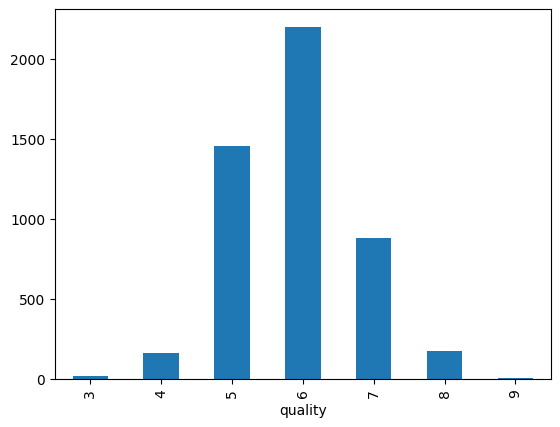

In [17]:
#
# 精度の改善
#
import matplotlib.pyplot as plt

# 品質データごとにグループ分けしてカウント
count = wine.groupby('quality')["quality"].count()
print(count)

# プロット
count.plot(kind='bar')
plt.show()

In [18]:
# ラベルを最適化することで、精度の向上を目指す。

new_quality_class = []

for v in list(y):
    if v <= 4:
        new_quality_class.append(0) #品質の悪いワイン
    elif v <= 7:
        new_quality_class.append(1) #品質が普通のワイン
    else:
        new_quality_class.append(2) #品質が良いワイン
y = new_quality_class

# 学習用とテスト用に分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 学習する
model = RandomForestClassifier()
model.fit(x_train, y_train)

# テストして結果を表示する
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print('正解率 = ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.14      0.23        36
           1       0.94      1.00      0.97       908
           2       1.00      0.33      0.50        36

    accuracy                           0.94       980
   macro avg       0.89      0.49      0.57       980
weighted avg       0.94      0.94      0.93       980

正解率 =  0.9418367346938775
